<a href="https://colab.research.google.com/github/rjsgk5792/AI_12th_project/blob/main/cp1_%ED%81%AC%EB%A1%A4%EB%A7%81%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%A0%84%EC%B2%98%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import sqlite3
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings



In [25]:
# 한글,마이너스 폰트 깨짐 해결
%config InlineBackend.figure_format='retina'
!apt -qq -y install fonts-nanum > /dev/null
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
import matplotlib as mpl
mpl.font_manager._rebuild()
mpl.pyplot.rc('font', family='NanumBarunGothic')

# 캔버스 사이즈 적용
plt.rcParams["figure.figsize"] = (12, 9)
warnings.filterwarnings("ignore")
%matplotlib inline

# 여기서부터 시작
* 인기가 많은 카테고리 및 브랜드
* 카테고리별, 세부카테고리별, 브랜드별 가격


In [33]:
df = pd.read_csv('/content/drive/MyDrive/부트캠프/cp1/크롤링된 데이터/without_click3.csv')
sneakers_df = df[df['세부카테고리']=='스니커즈'].reset_index(drop=True)
sneakers_df

,카테고리,세부카테고리,브랜드,상품명,구매가,거래량,저장수,피드수
0,신발,스니커즈,Jordan,Jordan 1 Retro High OG Black Mocha,600000,87000,26000,26000
1,신발,스니커즈,Nike,Nike Dunk Low Retro Black,178000,188000,101000,101000
2,신발,스니커즈,Nike,(W) Nike Dunk Low Black,195000,75000,53000,53000
3,신발,스니커즈,Nike,Nike Air Force 1 '07 Low White,124000,109000,93000,93000
4,신발,스니커즈,New Balance,New Balance 992 Made in USA Grey - D Standard,380000,52000,39000,39000
...,...,...,...,...,...,...,...,...
395,신발,스니커즈,Adidas,Adidas Yeezy Boost 350 V2 Semi Frozen Yellow,400000,622,988,988
396,신발,스니커즈,Maison Margiela,Maison Margiela Calfskin Replica Sneaker White,350000,441,792,792
397,신발,스니커즈,Asics,Asics x Andersson Bell Gel-1090 Glacier Grey S...,500000,2109,5179,5179
398,신발,스니커즈,Nike,Nike x Sacai LDWaffle White Nylon,599000,2634,4206,4206


In [46]:
data = pd.read_csv('/content/drive/MyDrive/부트캠프/cp1/크롤링된 데이터/click/8c0eed70158f2d51.csv')
data.head()

,카테고리,세부카테고리,상품명,출시일,발매가,XXXS,XXS,XS,S,M,L,XL,XXL,XXXL
0,의류,자켓,Supreme x The North Face Trekking Convertible ...,22/06/09,"$298 (약 386,500원)",0,0,0,"575,000","554,000","585,000","674,000","750,000",0
1,의류,자켓,Supreme x Nike Arc Corduroy Hooded Jacket Blac...,22/05/26,"$198 (약 256,800원)",0,0,0,"538,000","584,000","673,000","725,000",0,0
2,의류,자켓,Stone Island 114WN T.CO+OLD Overshirt Black - ...,-,-,0,0,"500,000","499,000","583,000","699,000","700,000","649,000",0
3,의류,자켓,Stussy Wave Dye Beach Shell Jacket Grey,-,"$175 (약 226,900원)",0,0,0,"384,000","475,000","478,000","489,000","679,000",0
4,의류,자켓,Supreme x The North Face Trekking Convertible ...,22/06/09,"$298 (약 386,500원)",0,0,0,"670,000","645,000","677,000","710,000","990,000",0


In [28]:
sneakers_df['피드수'] = sneakers_df['피드수'].astype('int')
sneakers_df.dtypes

카테고리      object
세부카테고리    object
브랜드       object
상품명       object
구매가        int64
거래량        int64
저장수        int64
피드수        int64
dtype: object

In [29]:
main_brand = pd.Series(sneakers_df['브랜드'].value_counts()[:4])
main_brand

Nike           156
Jordan         114
New Balance     42
Adidas          40
Name: 브랜드, dtype: int64

In [30]:
brand_ls = main_brand.index.tolist()

test1 = sneakers_df.loc[sneakers_df['브랜드']=='Nike']
test2 = sneakers_df.loc[sneakers_df['브랜드']=='Jordan']
test3 = sneakers_df.loc[sneakers_df['브랜드']=='New Balance']
test4 = sneakers_df.loc[sneakers_df['브랜드']=='Adidas']
main_brand_df = pd.concat([test1,test2,test3,test4])

In [31]:
avgs_price = []
avgs_trade = []
avgs_save = []
avgs_feed = []
for brand in brand_ls:
  row = sneakers_df.loc[sneakers_df['브랜드']==brand]
  avgs_price.append(row.mean()[0])
  avgs_trade.append(row.mean()[1])
  avgs_save.append(row.mean()[2])
  avgs_feed.append(row.mean()[3])

Average_df = pd.DataFrame(columns=['브랜드','평균구매가','평균거래량','평균저장수','평균피드수'])
Average_df['브랜드'] = pd.Series(brand_ls)
Average_df['평균구매가'] = pd.Series(avgs_price)
Average_df['평균거래량'] = pd.Series(avgs_trade)
Average_df['평균저장수'] = pd.Series(avgs_save)
Average_df['평균피드수'] = pd.Series(avgs_feed)

Average_df

,브랜드,평균구매가,평균거래량,평균저장수,평균피드수
0,Nike,251801.282051,8527.108974,11373.153846,11373.153846
1,Jordan,352070.175439,6921.929825,11668.412281,11668.412281
2,New Balance,220500.000000,8890.000000,7021.880952,7021.880952
3,Adidas,253900.000000,2853.025000,4339.425000,4339.425000


# EDA

## 브랜드별 평균가격

In [ ]:
# 가장 마지막 막대가 눈금이 표시되지 않는 에러로 반복문 사용 X

target = ['평균구매가','평균거래량','평균저장수','평균피드수']
for col in target:
  plt.figure(figsize=(15,3))
  chart = sns.barplot(data=Average_df,x=Average_df['브랜드'],y='평균구매가')
  # chart.set_xticklabels(chart.get_xticklabels())
  chart.set_title(f'{col} 비교')
  plt.gca().xaxis.set_major_locator(plt.MultipleLocator(1))
  plt.show(15)

Text(0.5, 1.0, '평균구매가')

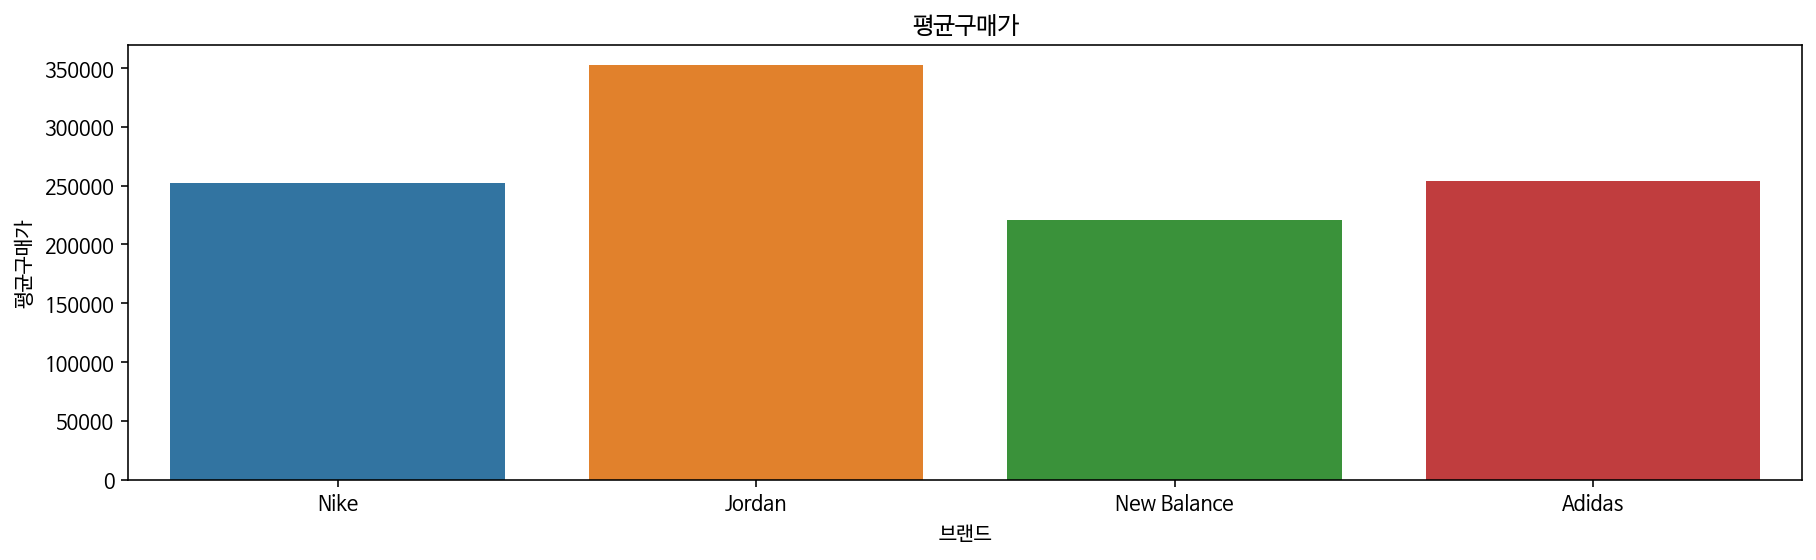

In [42]:
plt.figure(figsize=(15,4))
chart = sns.barplot(data=Average_df,x=Average_df['브랜드'],y='평균구매가')
chart.set_title('평균구매가')

Text(0.5, 1.0, '평균거래량')

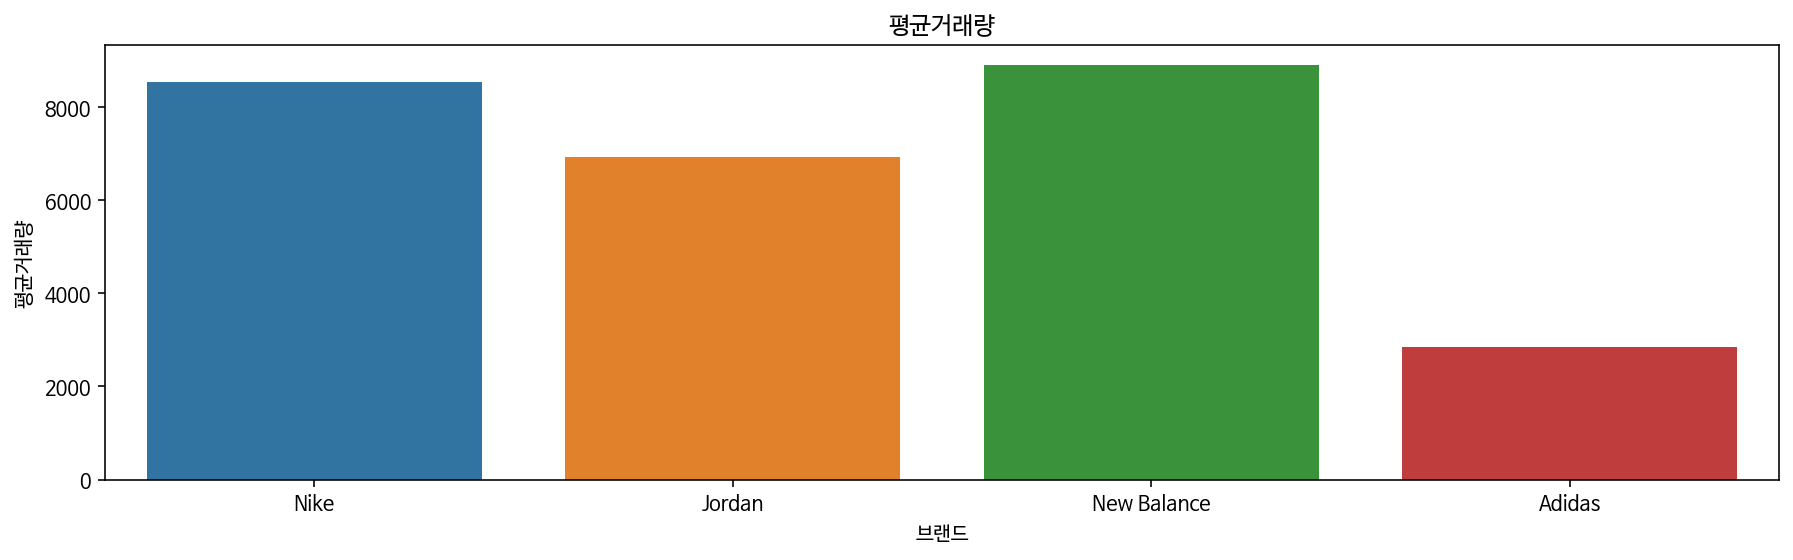

In [43]:
plt.figure(figsize=(15,4))
chart = sns.barplot(data=Average_df,x=Average_df['브랜드'],y='평균거래량')
chart.set_title('평균거래량')

Text(0.5, 1.0, '평균저장수')

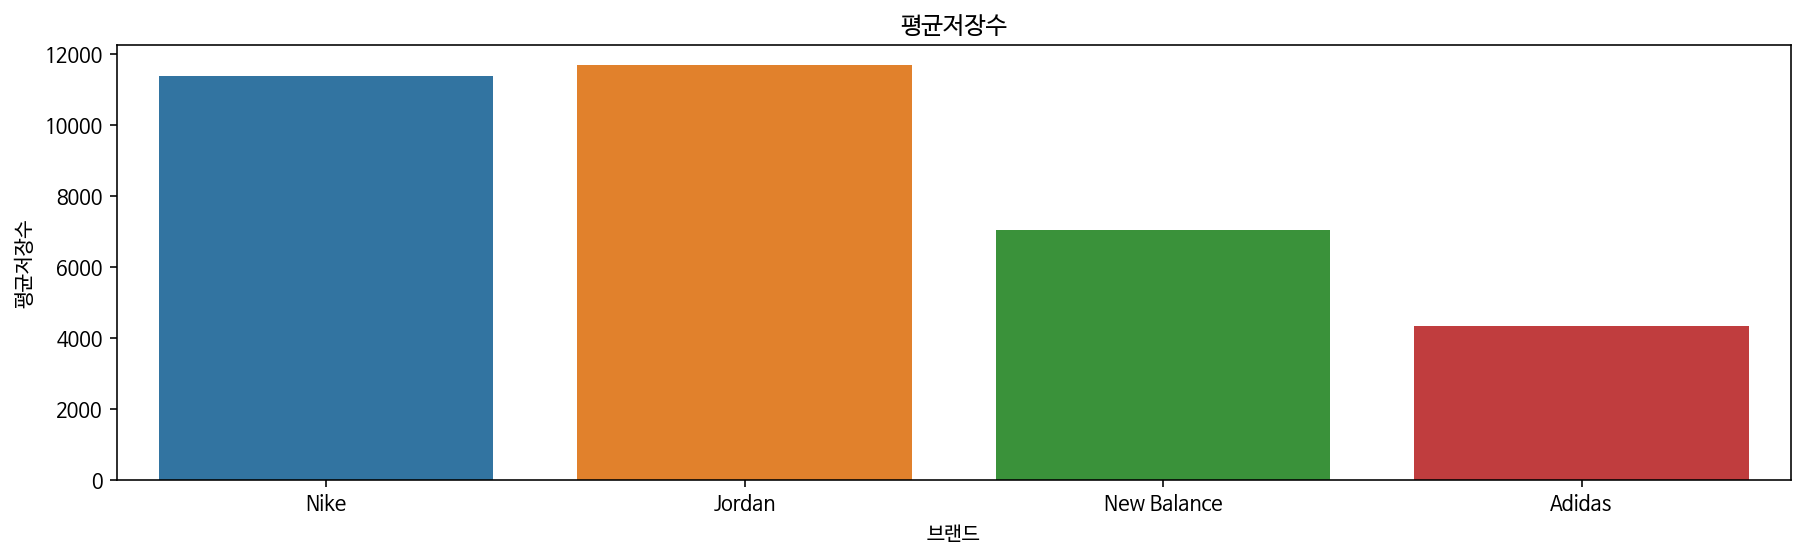

In [44]:
plt.figure(figsize=(15,4))
chart = sns.barplot(data=Average_df,x=Average_df['브랜드'],y='평균저장수')
chart.set_title('평균저장수')

Text(0.5, 1.0, '평균피드수')

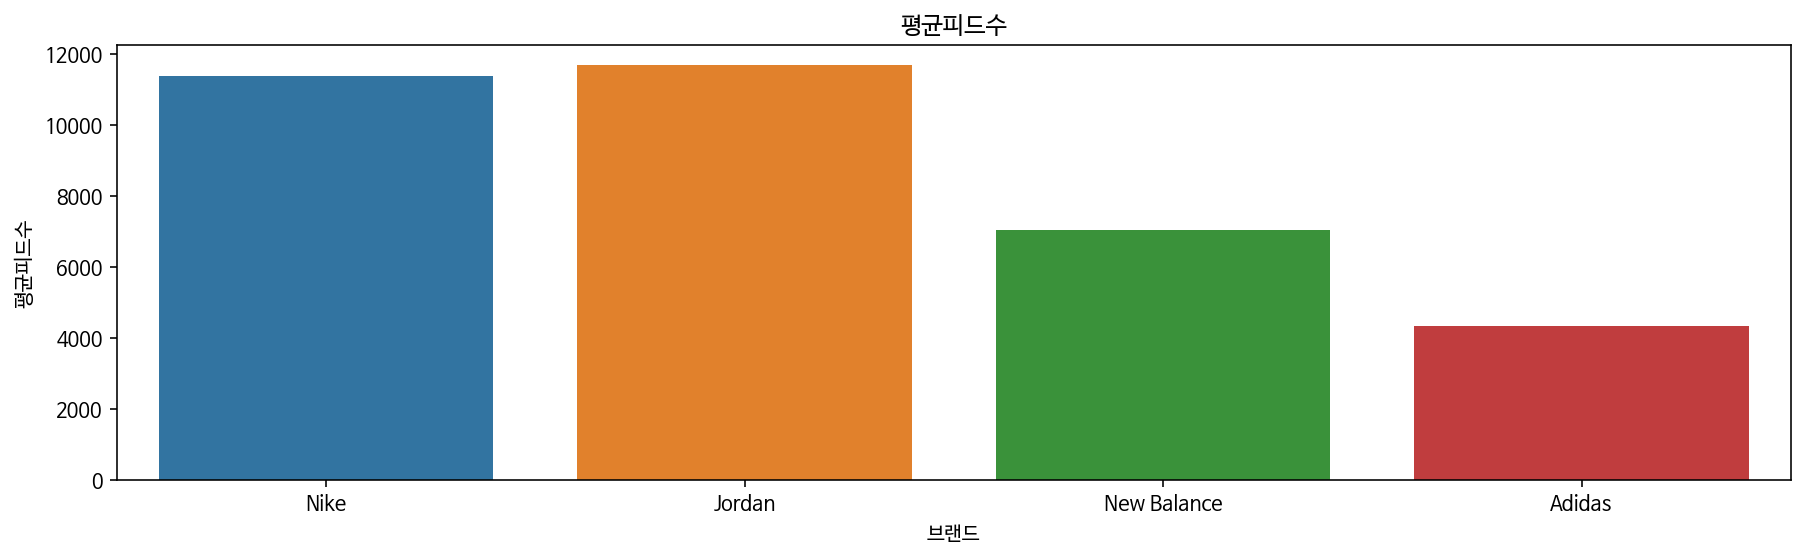

In [45]:
plt.figure(figsize=(15,4))
chart = sns.barplot(data=Average_df,x=Average_df['브랜드'],y='평균피드수')
chart.set_title('평균피드수'),

## 사이즈별 평균가격

## 출시일 -> 판매일 gap 에 따른 가격

In [ ]:
# 상품별이 아닌 브랜드별로 time gap에 따라 평균 가격이 어떻게 형성되는지도 알아보기